# Importation des bibliothèques

In [1]:
# Importation de la bibliothèque pandas pour la manipulation de données
import pandas as pd

# Importation de la bibliothèque matplotlib.pyplot pour la création de graphiques
import matplotlib.pyplot as plt

# Importation de la bibliothèque seaborn pour rendre les graphiques plus esthétiques
import seaborn as sns

# Importation de la bibliothèque numpy pour des opérations mathématiques avancées
import numpy as np

# Importation des données


In [2]:
# Chargement des données depuis le fichier Excel 
dataset = pd.read_excel("../DataSet/data_fifa_clean.xlsx")

In [3]:
# Lecture du dataset
dataset

,ID,Name,Age,Nationality,Overall,Potential,Wage,Preferred Foot,International Reputation,Weak Foot,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,GroupPositions,Imc
0,158023,L. Messi,31,Argentina,94,94,565000,Left,5,4,...,33,28,26,6,11,15,14,8,Striker,47.366142
1,20801,Cristiano Ronaldo,33,Portugal,94,94,405000,Right,5,4,...,28,31,23,7,11,15,14,11,Striker,45.429790
2,190871,Neymar Jr,26,Brazil,92,93,290000,Right,5,5,...,27,24,33,9,9,15,15,11,Winger,44.685039
3,193080,De Gea,27,Spain,91,93,260000,Right,4,3,...,15,21,13,90,85,87,88,94,Goalkeeper,41.706037
4,192985,K. De Bruyne,27,Belgium,91,92,355000,Right,4,5,...,68,58,51,15,13,5,10,13,Midfielder,45.876640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18114,238813,J. Lundstram,19,England,47,65,1000,Right,1,2,...,40,48,47,10,13,7,8,9,Midfielder,39.918635
18115,243165,N. Christoffersson,19,Sweden,47,63,1000,Right,1,2,...,22,15,19,10,9,9,5,12,Striker,42.202537
18116,241638,B. Worman,16,England,47,67,1000,Right,1,3,...,32,13,11,6,5,10,6,13,Striker,44.089239
18117,246268,D. Walker-Rice,17,England,47,66,1000,Right,1,3,...,20,25,27,14,6,14,8,9,Winger,45.876640


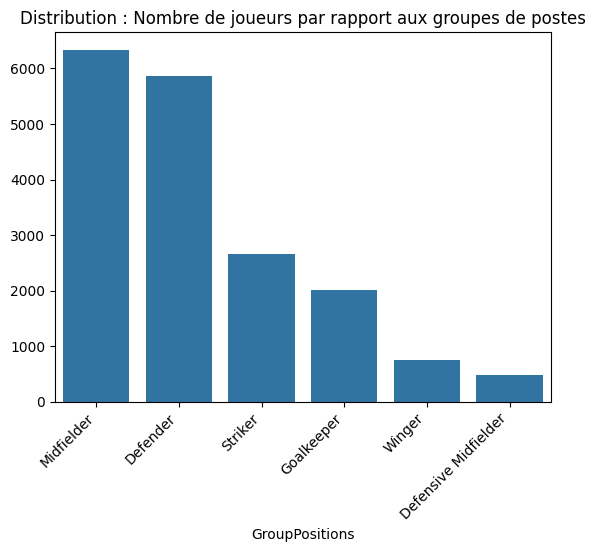

In [4]:
# Répartition des joueurs par groupes de postes:

# Calcul de l'effectif des joueurs par groupe de postes et tri par ordre décroissant
Occurences_joueurs_par_poste = dataset["GroupPositions"].value_counts().sort_values(ascending=False)

# Création du graphique de distribution à barres horizontales en utilisant Seaborn pour visualiser les données
sns.barplot(x=Occurences_joueurs_par_poste.index, y=Occurences_joueurs_par_poste.values)

# Personnalisation des étiquettes de l'axe des abscisses (X) en les faisant pivoter de 45 degrés
plt.xticks(rotation=45, ha='right')

# Ajout du titre au graphique
plt.title('Distribution : Nombre de joueurs par rapport aux groupes de postes')

# Affichage du graphique
plt.show()


## Fonctions 

In [5]:
# Fonction pour grouper et calculer la moyenne des compétences PAR groupe de postes:

def moyenne_competences_groupees(GroupPositions=""):
    # Récupération de l'index de la première à la dernière compétence dans le DataSet
    index_colonne_debut = dataset.columns.get_loc("Crossing")  
    index_colonne_fin = dataset.columns.get_loc("GKReflexes")

    # Sélection des colonnes des compétences dans le DataSet
    colonnes_competences = dataset.columns[index_colonne_debut:index_colonne_fin]

    # Filtrage des données du DataSet en fonction du groupe de postes spécifié   
    donnees_groupe = dataset[dataset["GroupPositions"]== GroupPositions]     

    # Calcule des moyennes des compétences pour le groupe spécifié et trie par ordre décroissant
    moyennes_groupe = donnees_groupe[colonnes_competences].mean().sort_values(ascending=False)     

    return moyennes_groupe[:7]     # Retourne seulement les 7 premières compétences (les plus élevées)

In [6]:
# Liste des catégories et des compétences associées
categories_evaluations = {
    "Offensive": ["Crossing", "Finishing", "Volleys", "Dribbling", "Curve", "FKAccuracy", "LongShots"],
    "Controles": ["ShortPassing", "LongPassing", "BallControl", "Vision"],
    "Vitesse": ["Agility", "SprintSpeed", "Acceleration"],
    "Force": ["Jumping", "ShotPower", "Stamina", "Strength"],
    "Réactivité": ["Reactions", "Balance", "Aggression", "Composure"],
    "Défense": ["Marking", "StandingTackle", "SlidingTackle", "Interceptions"],
    "Vision": ["Positioning", "Vision", "Penalties"]
}

In [7]:
# Fonction pour créer le graphique radar pour chaque groupe de postes:

def radar(label="", moyenne_geree=[], couleur=""):
    # Récupération des catégories d'évaluations à partir du dictionnaire
    categories = list(categories_evaluations.keys())

    # Nombre de catégories
    num_categories = 7

    # Calcul des angles pour chaque catégorie
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

    # Ajout du premier angle à la fin pour fermer le cercle
    angles += angles[:1]

    # Ajout de la première valeur à la fin pour fermer le polygone
    moyenne_geree = np.append(moyenne_geree, moyenne_geree[0])

    # Création de la figure et du sous-plot polar
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Traçage de la ligne du graphique radar
    ax.plot(angles, moyenne_geree, color=couleur, linewidth=1)

    # Remplissage de la zone sous la ligne pour un aspect radar
    ax.fill(angles, moyenne_geree, color=couleur, alpha=0.13, label=label)

    # Configuration des étiquettes sur l'axe x (catégories)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Ajout d'une légende pour identifier chaque poste
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Affichage du graphique radar
    return plt.show()


In [8]:
# Fonction pour voir la distribution des compétences par groupe de postes:

def distribution_moyenne_competences(GroupPositions=""):
    # Récupération de l'index de la première compétence à la colonne "GroupPositions" dans le DataSet
    index_colonne_debut = dataset.columns.get_loc("Crossing")
    index_colonne_fin = dataset.columns.get_loc("GroupPositions")

    # Sélection des colonnes des compétences dans le DataSet
    colonnes_competences = dataset.columns[index_colonne_debut:index_colonne_fin]

    # Filtrage des données du DataSet en fonction du groupe de postes spécifié
    donnees_poste = dataset[dataset["GroupPositions"]== GroupPositions]

    # Calcul des moyennes des compétences pour le groupe spécifié et tri par ordre décroissant
    moyennes_compétences = donnees_poste[colonnes_competences].mean().sort_values(ascending=False)

    # Traçage d'un graphique à barres pour visualiser la distribution des compétences
    sns.barplot(x=moyennes_compétences.index, y=moyennes_compétences.values)

    # Personnalisation des étiquettes de l'axe des abscisses (X) en les faisant pivoter de 45 degrés
    plt.xticks(rotation=45, ha='right')

    # Affichage du graphique
    return plt.show()


In [9]:
# Fonction pour voir la répartition des compétences groupées par groupe de postes:

def distribution_competences_groupees(GroupPositions=""):
    # Appel de la fonction moyenne_competences_groupees pour obtenir les moyennes des compétences
    moyenne = moyenne_competences_groupees(GroupPositions=GroupPositions)

    # Traçage d'un graphique à barres pour visualiser la distribution des compétences groupées
    sns.barplot(x=moyenne.index, y=moyenne.values)

    # Personnalisation des étiquettes d'axe x en les faisant pivoter de 45 degrés 
    plt.xticks(rotation=45, ha='right')

    # Affichage du graphique
    return plt.show()


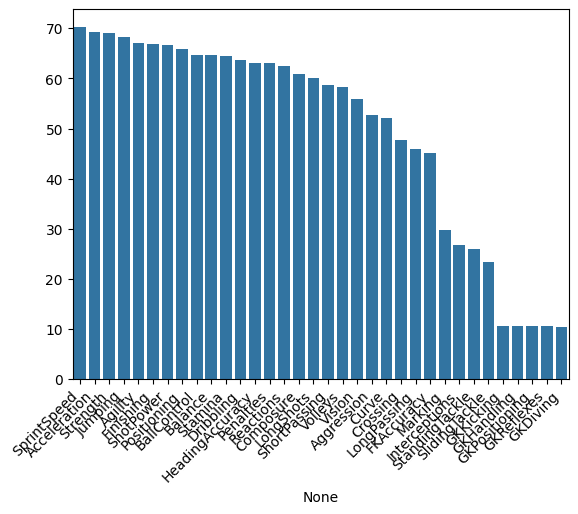

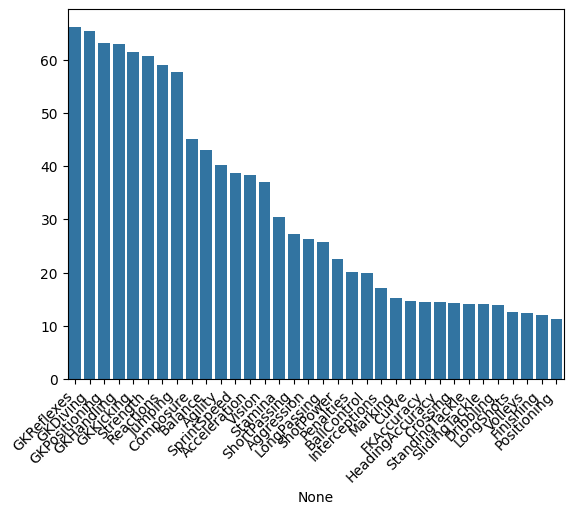

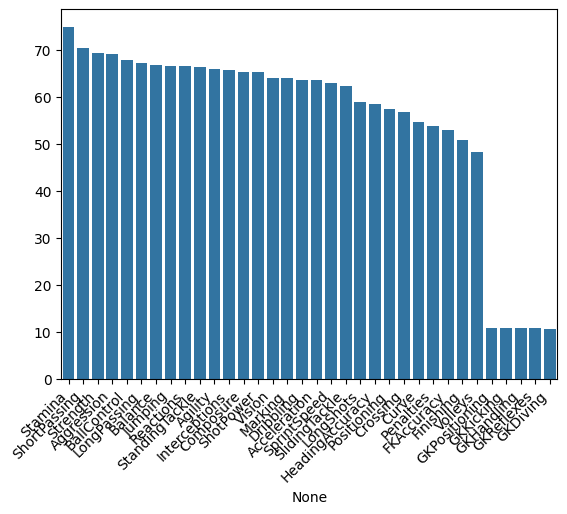

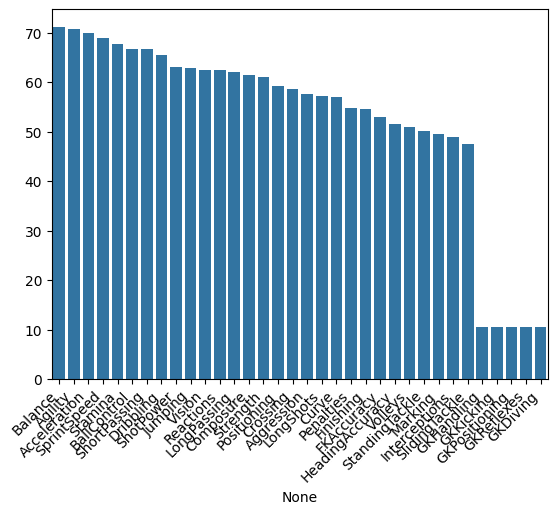

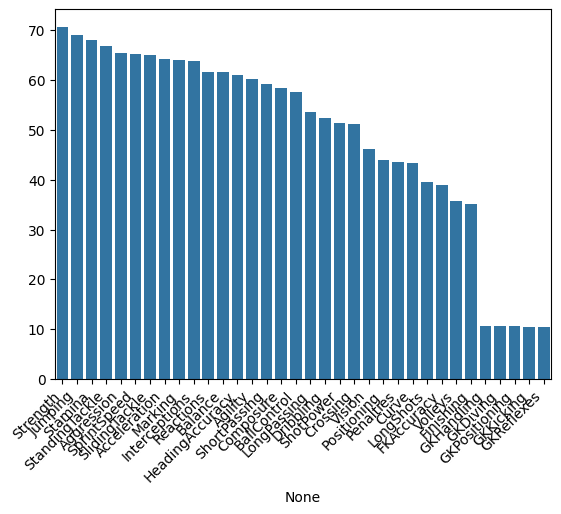

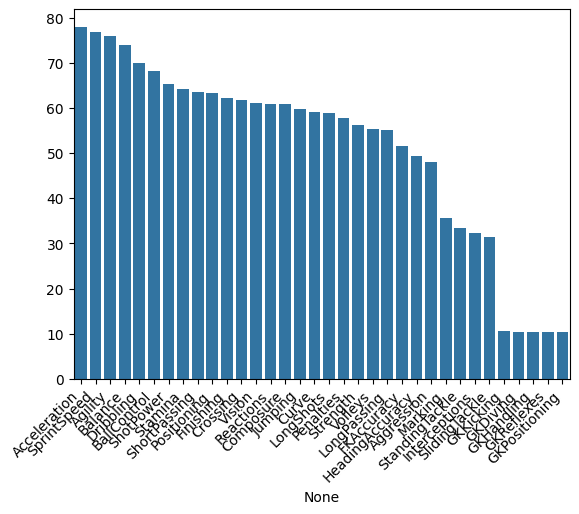

In [10]:
# Graphiques
distribution_moyenne_competences(GroupPositions="Striker")
distribution_moyenne_competences(GroupPositions="Goalkeeper")
distribution_moyenne_competences(GroupPositions="Defensive Midfielder")
distribution_moyenne_competences(GroupPositions="Midfielder")
distribution_moyenne_competences(GroupPositions="Defender")
distribution_moyenne_competences(GroupPositions="Winger")

In [11]:
# Liste des compétences représentant différentes aspects des joueurs
competences = ["Crossing", "Finishing", "HeadingAccuracy", "ShortPassing", "Volleys", "Dribbling",
               "Curve", "FKAccuracy", "LongPassing", "BallControl", "Acceleration", "SprintSpeed",
               "Agility", "Reactions", "Balance", "ShotPower", "Jumping", "Stamina", "Strength",
               "LongShots", "Aggression", "Interceptions", "Positioning", "Vision", "Penalties",
               "Composure", "Marking", "StandingTackle", "SlidingTackle", "GKDiving", "GKHandling",
               "GKKicking", "GKPositioning", "GKReflexes"]


In [12]:
# Calcul des moyennes des compétences pour chaque groupe de postes
moyennes_par_poste = dataset.groupby("GroupPositions")[competences].mean()

# Réorganisation des colonnes pour les afficher par ordre décroissant de moyenne
moyennes_par_poste = moyennes_par_poste[competences].mean(axis=1).sort_values(ascending=False)

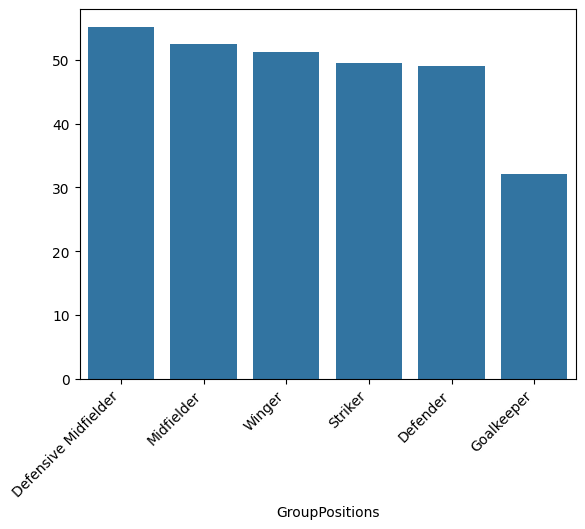

In [13]:
# Création d'un diagramme à barres avec seaborn
sns.barplot(x=moyennes_par_poste.index, y=moyennes_par_poste.values)
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
# Calcul de la moyenne pour chaque catégorie et ajout des colonnes au DataSet
for categorie, competences in categories_evaluations.items():
    dataset[f"Moyenne_{categorie}"] = dataset[competences].mean(axis=1)

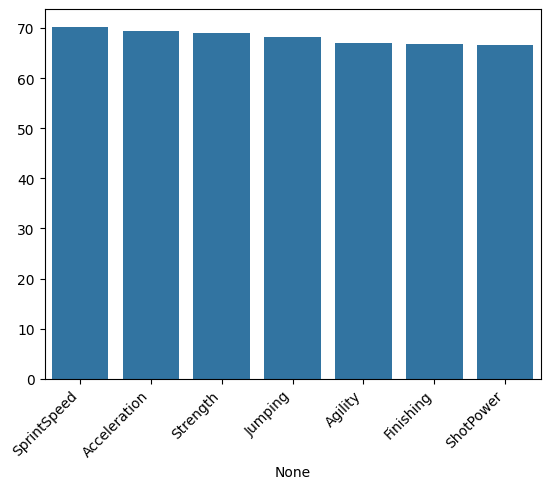

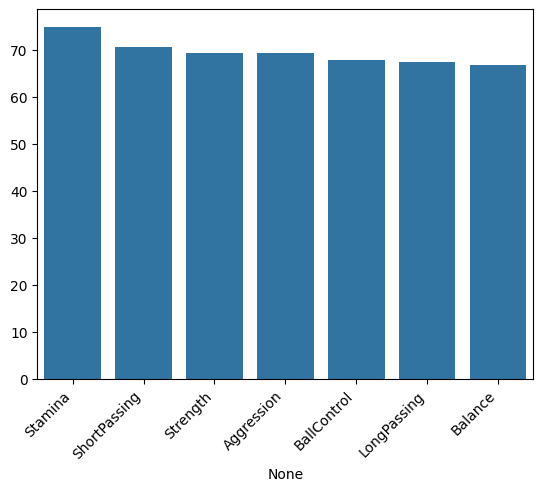

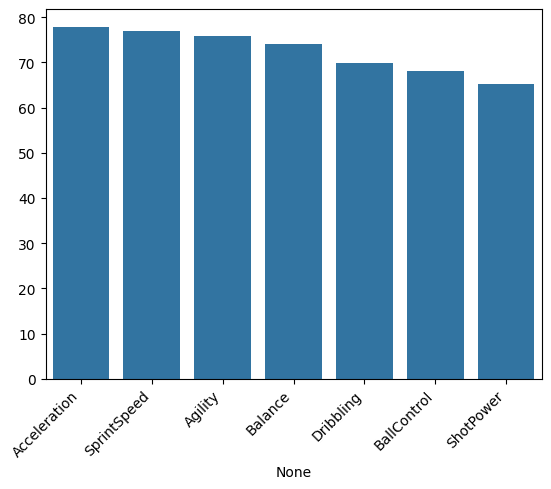

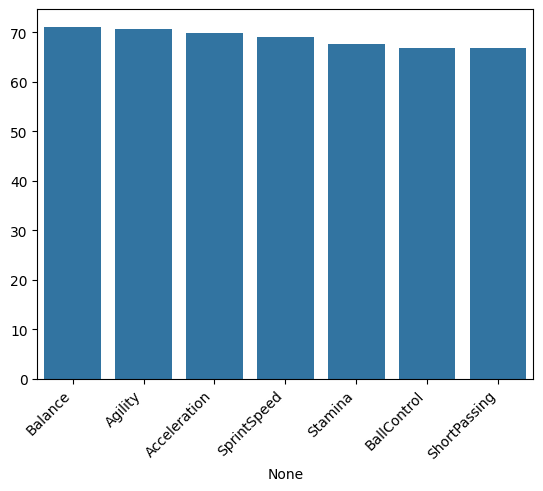

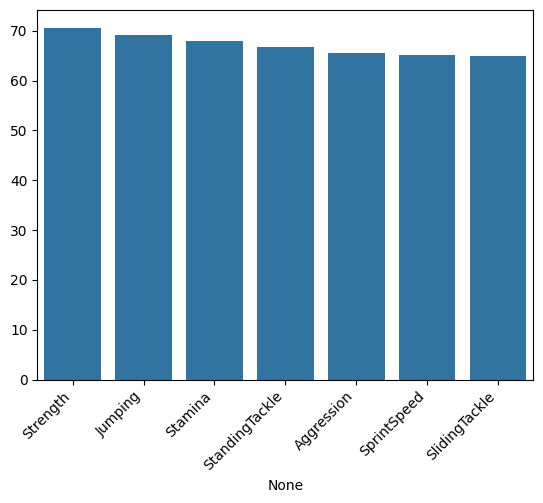

In [15]:
# Graphiques de distribution des compétences groupées par groupe de postes
distribution_competences_groupees(GroupPositions="Striker")
distribution_competences_groupees(GroupPositions="Defensive Midfielder")
distribution_competences_groupees(GroupPositions="Winger")
distribution_competences_groupees(GroupPositions="Midfielder")
distribution_competences_groupees(GroupPositions="Defender")